# Harikrishnan U S
# R7B - 365

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
train_images = train_images.reshape((60000, 28, 28, 1)) 
test_images = test_images.reshape((10000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255 
test_images = test_images.astype('float32') / 255 
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels) 

# Create the model
def create_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

optimizers = ['adam', 'adagrad', 'adadelta', 'adamax', 'nadam', 'rmsprop',
              'sgd']
history_dict = {}

for optimizer in optimizers:
    print(f"\nTraining {optimizer} optimizer:")
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, 
                        validation_data=(test_images, test_labels), 
                        epochs=5, batch_size=64)
    history_dict[optimizer] = history.history


Training adam optimizer:
Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3468 - accuracy: 0.9042 - val_loss: 0.1899 - val_accuracy: 0.9428
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1646 - accuracy: 0.9527 - val_loss: 0.1413 - val_accuracy: 0.9579
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1237 - accuracy: 0.9639 - val_loss: 0.1174 - val_accuracy: 0.9646
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0997 - accuracy: 0.9706 - val_loss: 0.1029 - val_accuracy: 0.9692
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0828 - accuracy: 0.9756 - val_loss: 0.1003 - val_accuracy: 0.9701

Training adagrad optimizer:
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 1.5686 - accuracy: 0.6011 - val_loss: 1.0450 - val_accuracy: 0.7930
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.8702 - accuracy: 0.8168 

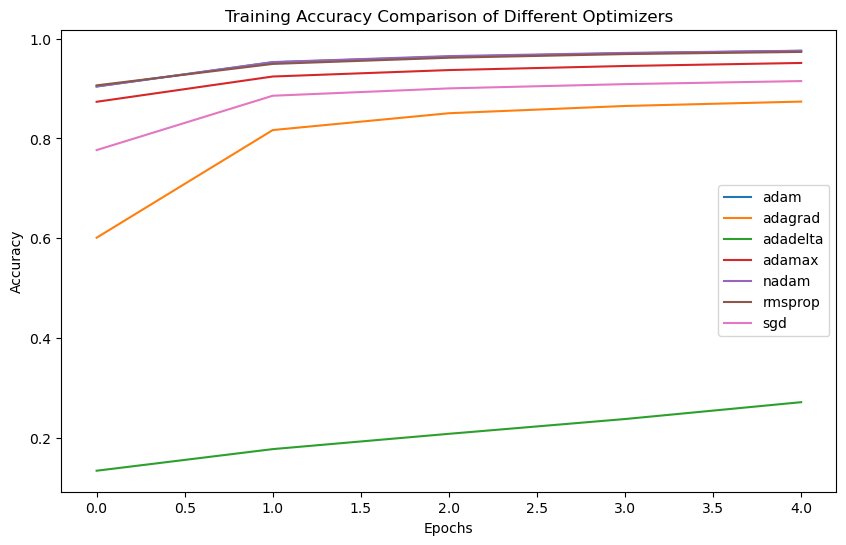

In [5]:
# Plot training history
plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['accuracy'], label=optimizer)
plt.title('Training Accuracy Comparison of Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

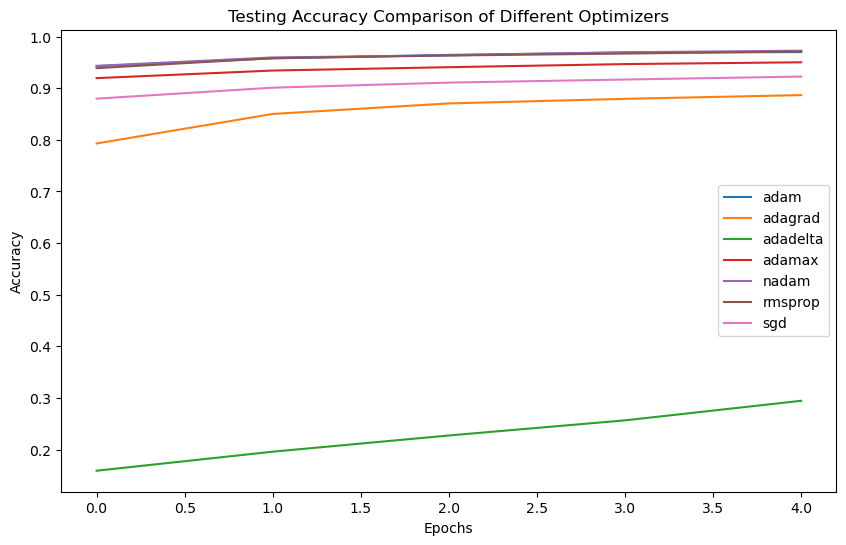

In [6]:
# Plot training history
plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['val_accuracy'], label=optimizer)
plt.title('Testing Accuracy Comparison of Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()